In [1]:
%load_ext autoreload
%autoreload 2

from dotenv import load_dotenv
import pandas as pd
import numpy as np
import os
import sys
import datetime

root_path = os.path.abspath(os.path.join('..'))
if root_path not in sys.path:
    sys.path.append(root_path)
    

load_dotenv()

True

In [2]:
from utils.utils import date_range, preprocess_b

df_test = pd.concat([
    pd.read_csv(f'../datasets/d{d.strftime("%Y-%m-%d")}.csv') for d in date_range(
        datetime.date(2019, 12, 15), 
        datetime.date(2020, 1, 1),
        datetime.timedelta(days=1),
    )
])

X_test, y_test = preprocess_b(df_test)

X_test.shape, y_test.shape

((264358, 124), (264358, 4))

In [3]:
from keras.models import Model, load_model

from utils.utils import plot_accuracy, data_descale

8262/8262 [==============================] - 11s 1ms/step


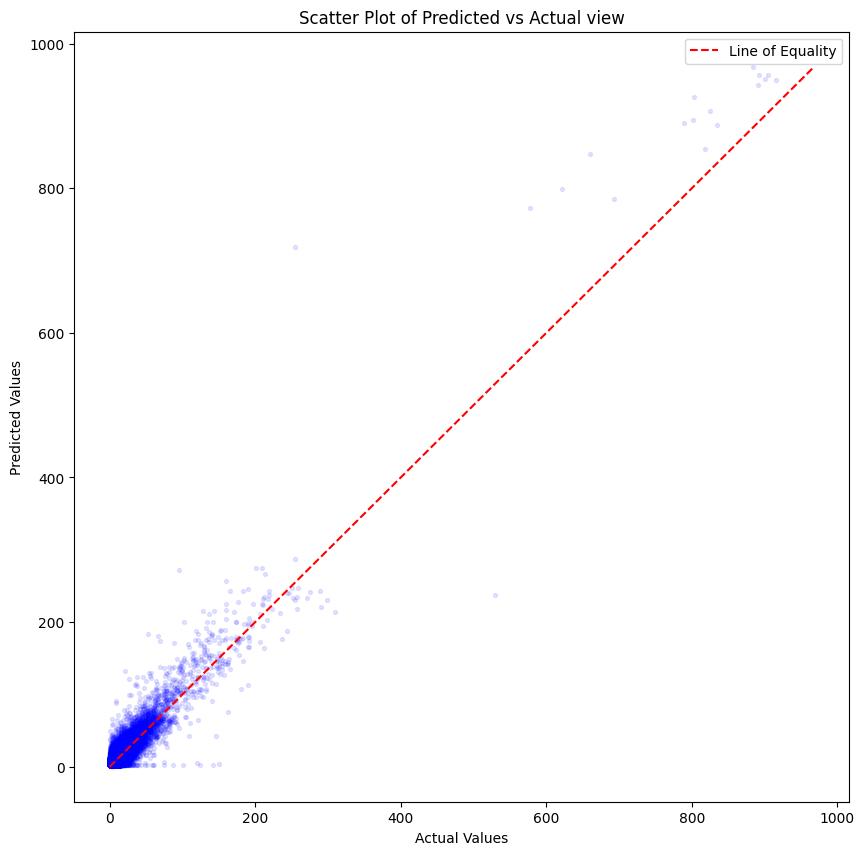

In [4]:
# test predict view
model_view: Model = load_model('../model/b-view.keras')
p_view = model_view.predict(X_test)
p_view = data_descale(p_view[:, 0], 'view')
plot_accuracy(p_view, df_test['view'], "view")


8262/8262 [==============================] - 13s 2ms/step


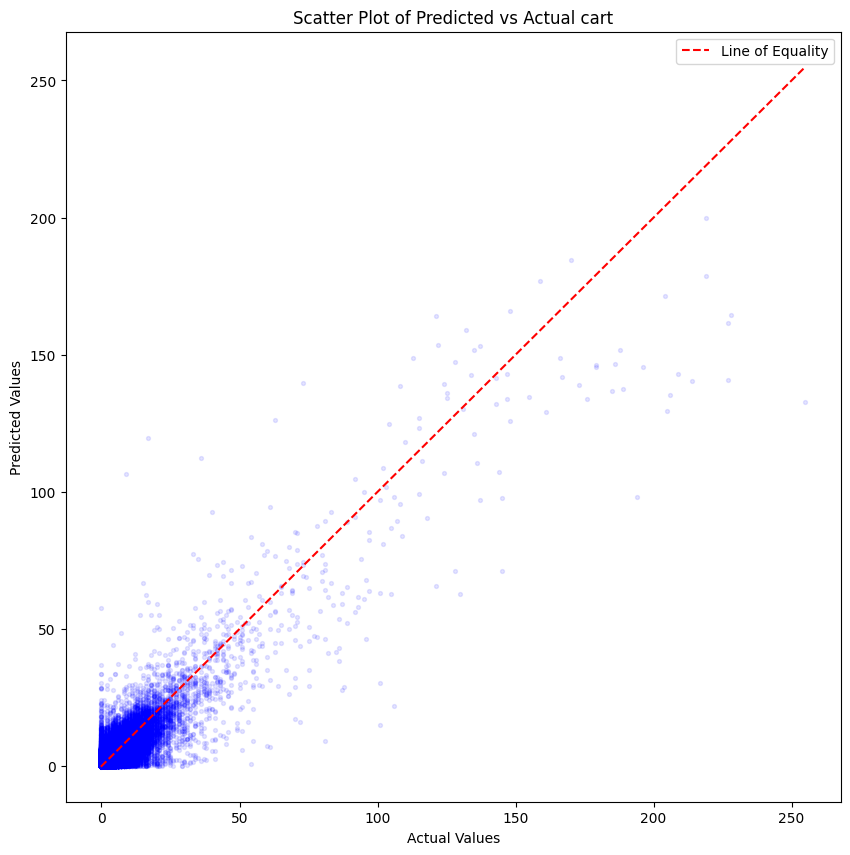

In [5]:
# test predict cart
model_cart: Model = load_model('../model/b-cart.keras')
p_cart = model_cart.predict(X_test)
p_cart = data_descale(p_cart[:, 0], 'cart')
plot_accuracy(p_cart, df_test['cart'], "cart")

8262/8262 [==============================] - 13s 2ms/step


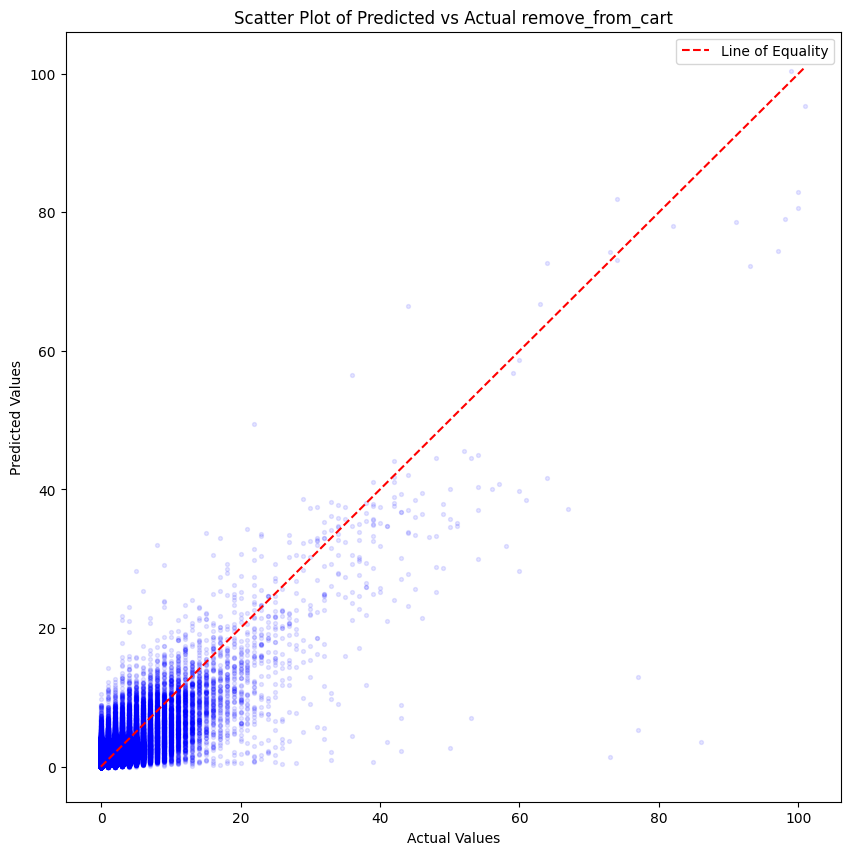

In [6]:
# test predict remove_from_cart
model_remove_from_cart: Model = load_model('../model/d-remove_from_cart.keras')
p_remove_from_cart = model_remove_from_cart.predict(X_test)
p_remove_from_cart = data_descale(p_remove_from_cart[:, 0], 'remove_from_cart')
plot_accuracy(p_remove_from_cart, df_test['remove_from_cart'], "remove_from_cart")

8262/8262 [==============================] - 13s 2ms/step


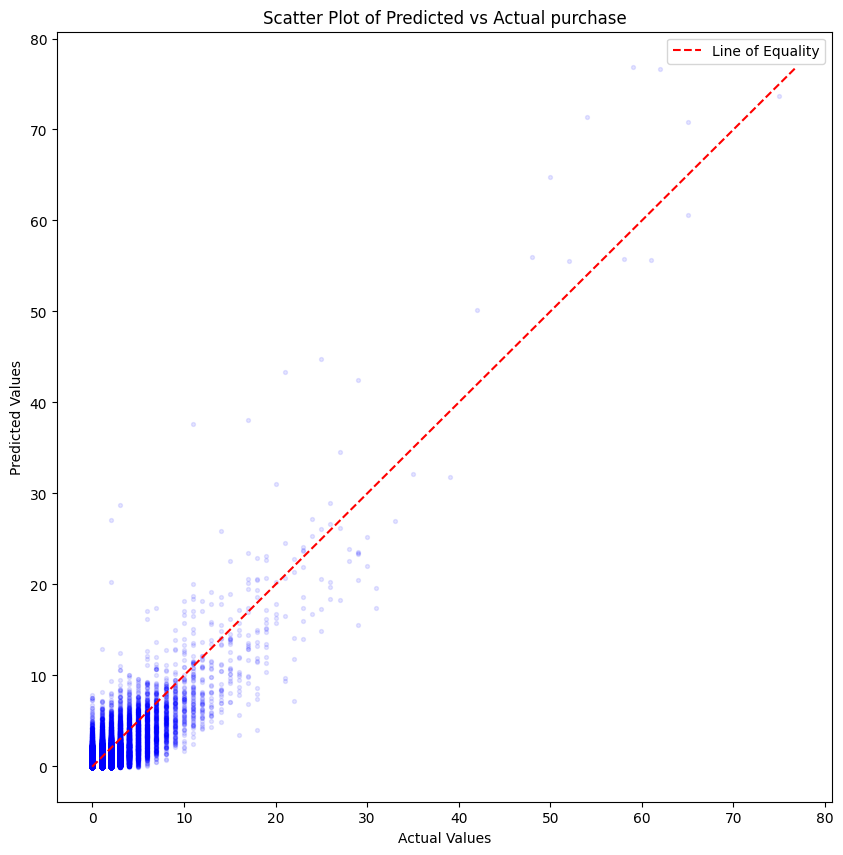

In [7]:
# test predict purchase
model_purchase: Model = load_model('../model/b-purchase.keras')
p_purchase = model_purchase.predict(X_test)
p_purchase = data_descale(p_purchase[:, 0], 'purchase')
plot_accuracy(p_purchase, df_test['purchase'], "purchase")


In [8]:
# concatenate and save to CSV
df = pd.DataFrame({ 
    'predicted_view': p_view,
    'actual_view': df_test['view'],
    'predicted_cart': p_cart,
    'actual_cart': df_test['cart'],
    'predicted_remove_from_cart': p_remove_from_cart,
    'actual_remove_from_cart': df_test['remove_from_cart'],
    'predicted_purchase': p_purchase,
    'actual_purchase': df_test['purchase'],
})
df.to_csv('../.data/test/c-test.csv')
